In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df=pd.read_csv('./data/RRCA_baseflow.csv')

In [4]:
df['Date']=df['Date']-693963

In [10]:
df1= pd.DataFrame.copy(df)

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,27847,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,27878,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,27908,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,27939,98,721870,14387040,0.00,0.00,0.0,0.120000


In [20]:
#converting days to date fromat

def convert_to_date(days):
    base_date = datetime(1900, 1, 1)
    target_date = base_date + timedelta(days=days)
    return target_date.strftime('%Y-%m-%d')

for i in range(len(df)):
    df1.loc[i,'Date']=convert_to_date(int(df.loc[i,'Date']))
    df1['Date'] = pd.to_datetime(df1['Date'])

In [32]:
df1

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,1939-09-30,123,859150,14714400,1.98,14.60,0.00000,13.793443
1,1939-09-30,256,1941550,14524320,1.96,18.90,0.00000,13.524590
2,1939-09-30,194,970030,14571840,1.98,16.10,0.00000,27.272131
3,1939-09-30,189,1392430,14571840,0.00,0.00,0.00000,0.000000
4,1939-09-30,157,1022830,14672160,1.98,14.00,0.00000,70.885246
...,...,...,...,...,...,...,...,...
15586,2000-08-30,56,1170670,14582400,0.00,0.00,0.00000,3.289508
15587,2000-08-30,178,927790,14540160,5.02,15.65,-0.77655,-5.476229
15588,2000-08-30,152,1360750,14529600,5.02,22.02,-0.36817,0.355738
15589,2000-08-30,171,1508590,14524320,5.02,0.00,-0.23088,0.762295


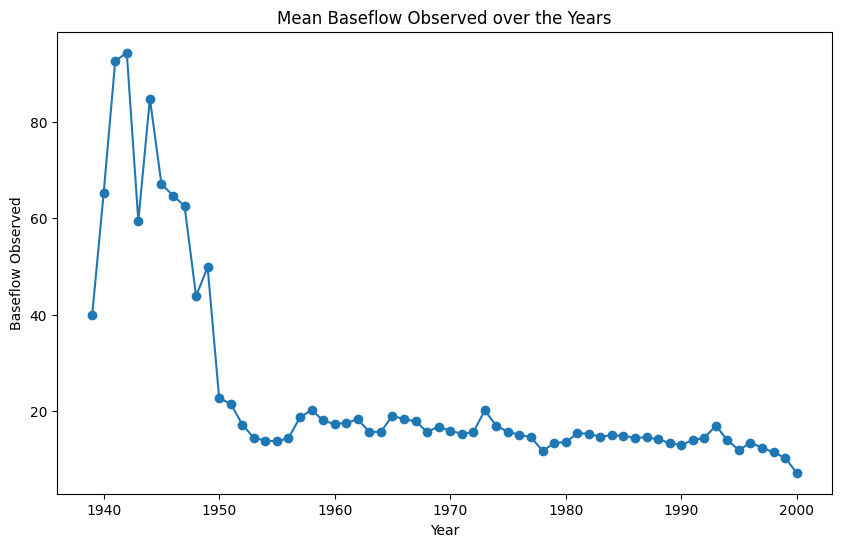

In [47]:
df1['Year'] = df1['Date'].dt.year

# Group by year and calculate the mean of 'Observed'
observed_by_year = df1.groupby('Year')['Observed'].mean()

plt.figure(figsize=(10, 6))
plt.plot(observed_by_year.index, observed_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Baseflow Observed')
plt.title('Mean Baseflow Observed over the Years')
plt.show()

In [27]:
df1.corr()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
Date,1.000000,-0.136997,0.070091,-0.011757,-0.031216,-0.017770,-0.202522,-0.234023
Segment_id,-0.136997,1.000000,0.237616,0.056727,-0.050775,-0.051083,0.065033,0.337919
x,0.070091,0.237616,1.000000,0.090145,-0.164104,-0.014881,0.120382,0.089616
y,-0.011757,0.056727,0.090145,1.000000,0.234267,0.423279,-0.049067,0.101751
Evapotranspiration,-0.031216,-0.050775,-0.164104,0.234267,1.000000,0.428491,-0.495154,0.062248
Precipitation,-0.017770,-0.051083,-0.014881,0.423279,0.428491,1.000000,-0.154587,0.270033
Irrigation_pumping,-0.202522,0.065033,0.120382,-0.049067,-0.495154,-0.154587,1.000000,0.054757
Observed,-0.234023,0.337919,0.089616,0.101751,0.062248,0.270033,0.054757,1.000000


In [46]:
segment_grouped = df1.groupby('Segment_id').agg({'Evapotranspiration': 'sum', 'Precipitation': 'sum', 'Irrigation_pumping': 'sum', 'Observed': 'mean'})

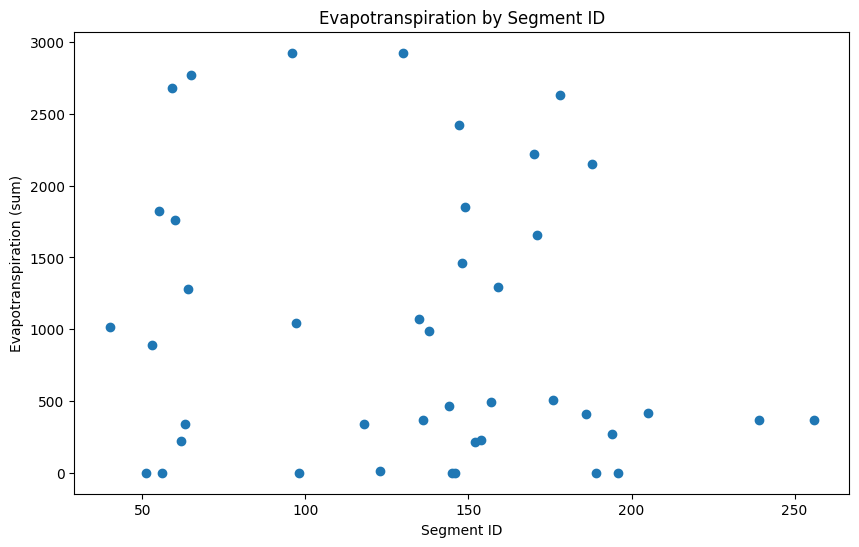

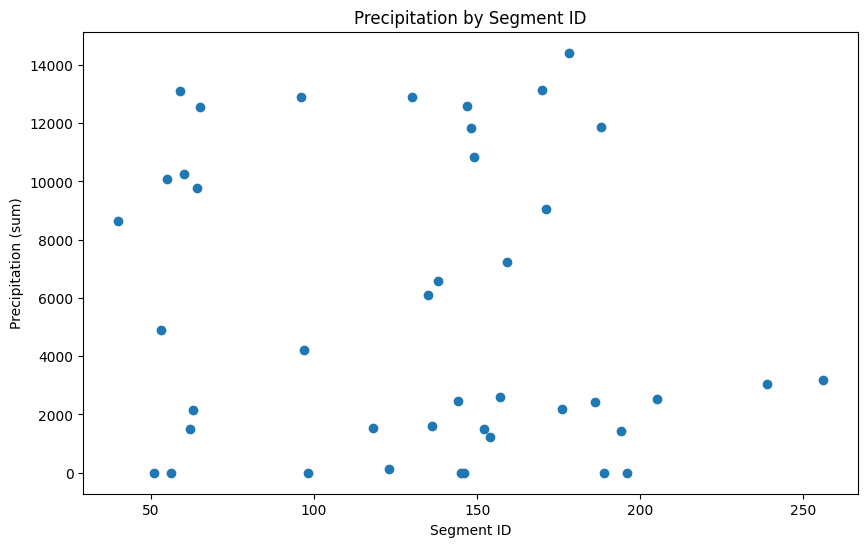

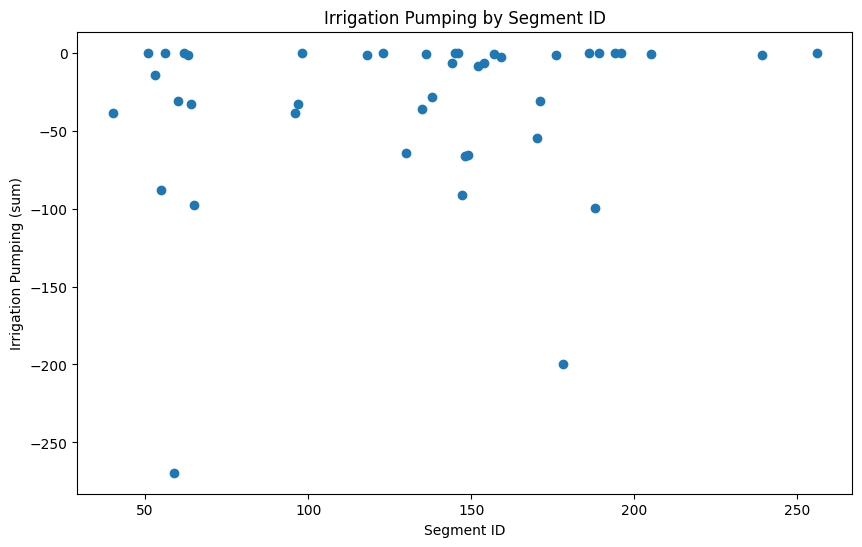

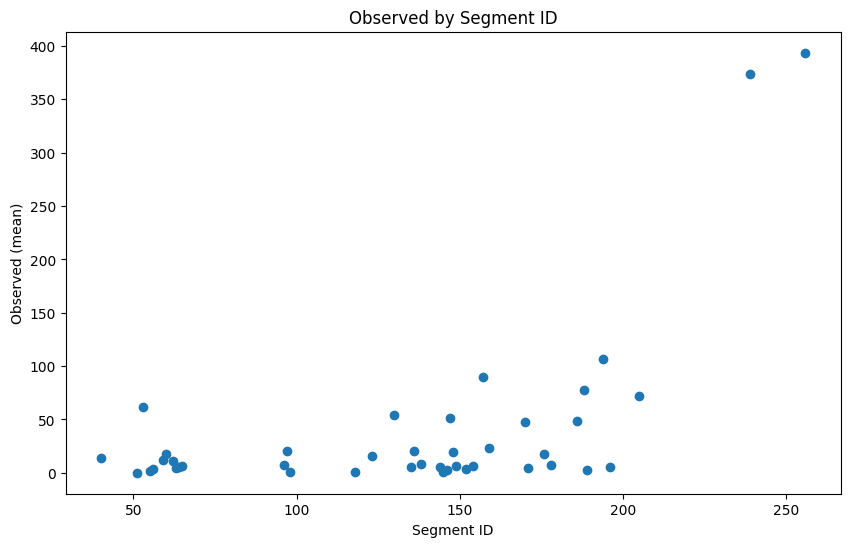

In [42]:
# Plot for Evapotranspiration
plt.figure(figsize=(10, 6))
plt.scatter(segment_grouped.index, segment_grouped['Evapotranspiration'])
plt.xlabel('Segment ID')
plt.ylabel('Evapotranspiration (sum)')
plt.title('Evapotranspiration by Segment ID')
plt.show()

# Plot for Precipitation
plt.figure(figsize=(10, 6))
plt.scatter(segment_grouped.index, segment_grouped['Precipitation'])
plt.xlabel('Segment ID')
plt.ylabel('Precipitation (sum)')
plt.title('Precipitation by Segment ID')
plt.show()

# Plot for Irrigation_pumping
plt.figure(figsize=(10, 6))
plt.scatter(segment_grouped.index, segment_grouped['Irrigation_pumping'])
plt.xlabel('Segment ID')
plt.ylabel('Irrigation Pumping (sum)')
plt.title('Irrigation Pumping by Segment ID')
plt.show()

# Plot for Observed
plt.figure(figsize=(10, 6))
plt.scatter(segment_grouped.index, segment_grouped['Observed'])
plt.xlabel('Segment ID')
plt.ylabel('Observed (mean)')
plt.title('Observed by Segment ID')
plt.show()


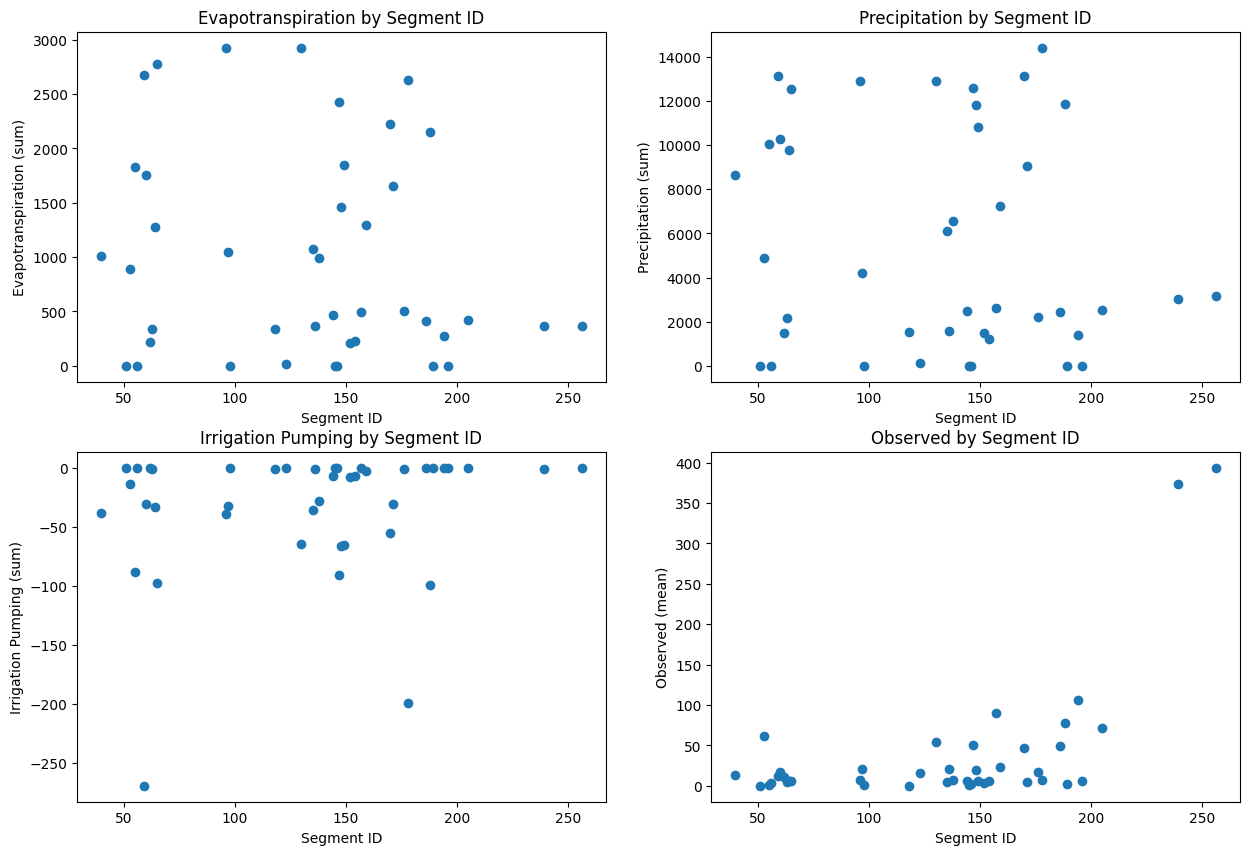

In [45]:
# Analysis by segment_id over years for Evapotranspiration,Precipitation,Irrigation Pumping,Observed
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot for Evapotranspiration
axs[0, 0].scatter(segment_grouped.index, segment_grouped['Evapotranspiration'])
axs[0, 0].set_xlabel('Segment ID')
axs[0, 0].set_ylabel('Evapotranspiration (sum)')
axs[0, 0].set_title('Evapotranspiration by Segment ID')

# Plot for Precipitation
axs[0, 1].scatter(segment_grouped.index, segment_grouped['Precipitation'])
axs[0, 1].set_xlabel('Segment ID')
axs[0, 1].set_ylabel('Precipitation (sum)')
axs[0, 1].set_title('Precipitation by Segment ID')

# Plot for Irrigation_pumping
axs[1, 0].scatter(segment_grouped.index, segment_grouped['Irrigation_pumping'])
axs[1, 0].set_xlabel('Segment ID')
axs[1, 0].set_ylabel('Irrigation Pumping (sum)')
axs[1, 0].set_title('Irrigation Pumping by Segment ID')

# Plot for Observed
axs[1, 1].scatter(segment_grouped.index, segment_grouped['Observed'])
axs[1, 1].set_xlabel('Segment ID')
axs[1, 1].set_ylabel('Observed (mean)')
axs[1, 1].set_title('Observed by Segment ID')

plt.show()


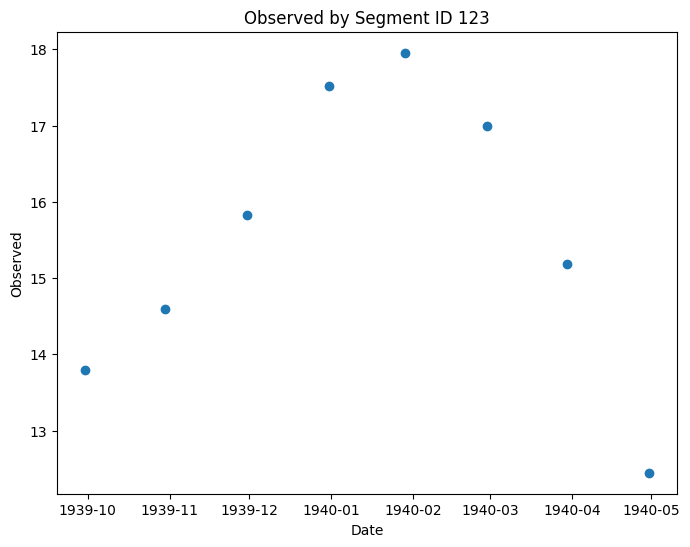

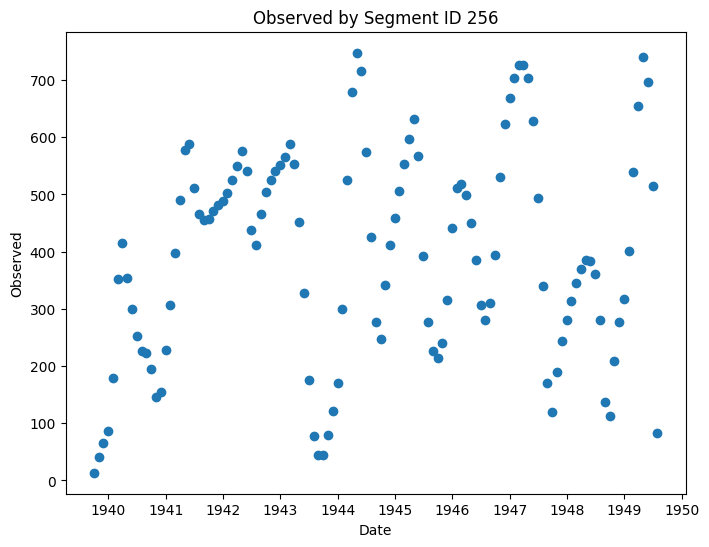

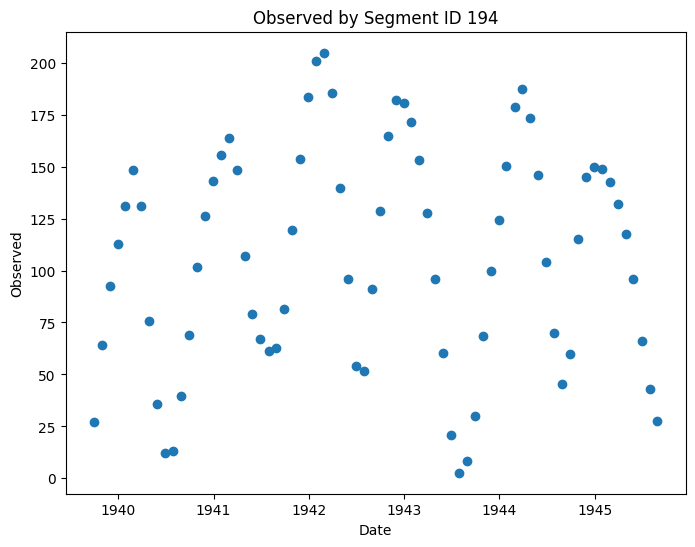

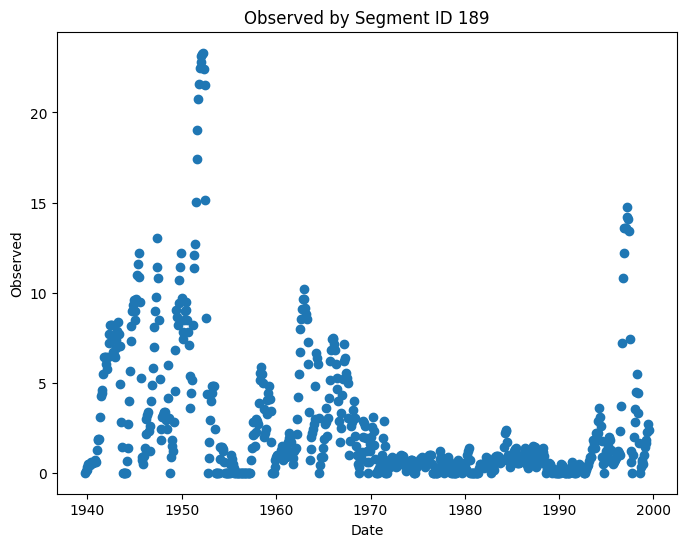

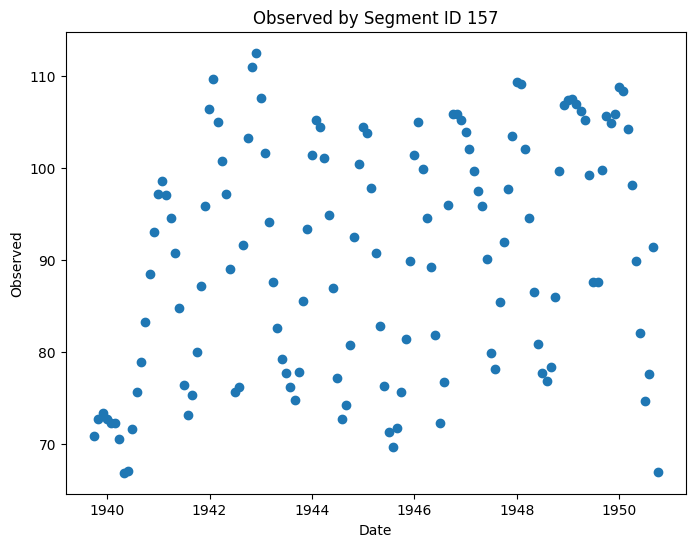

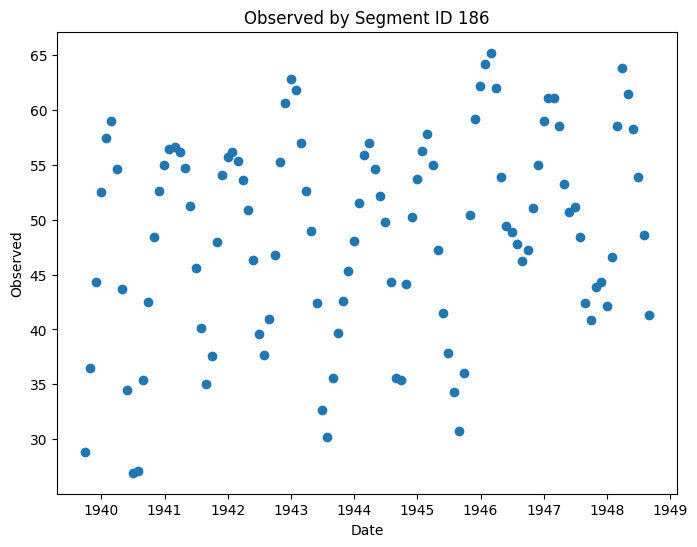

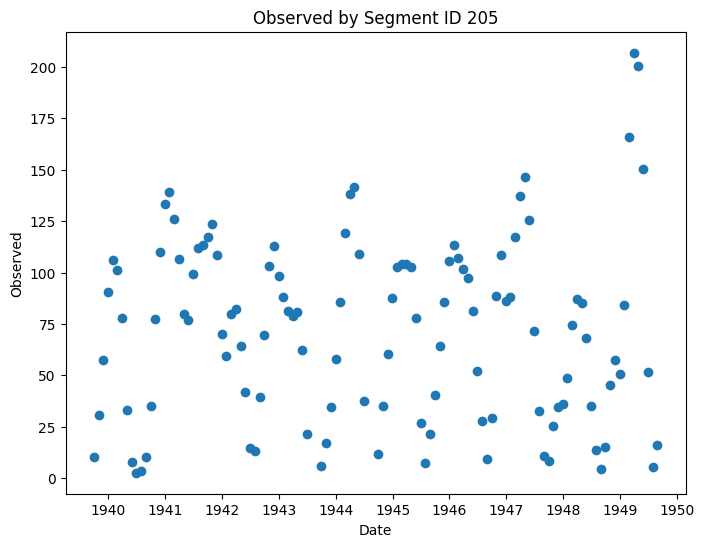

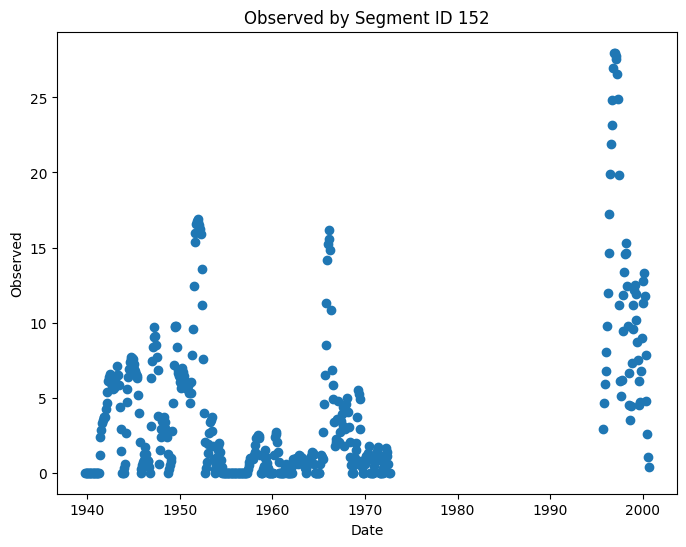

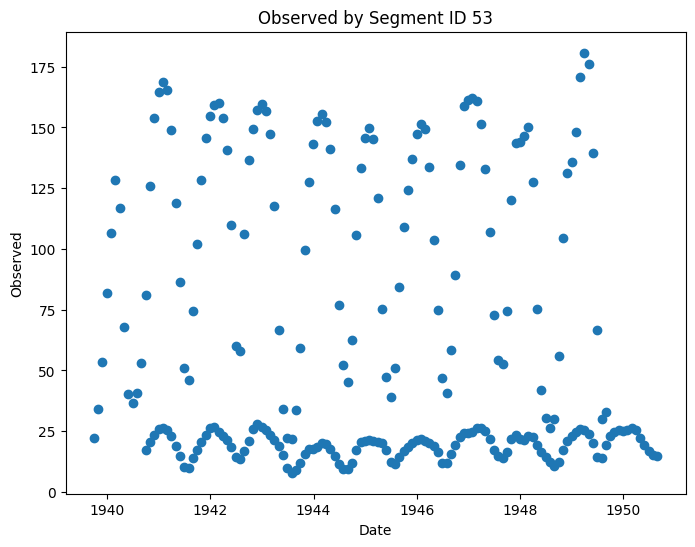

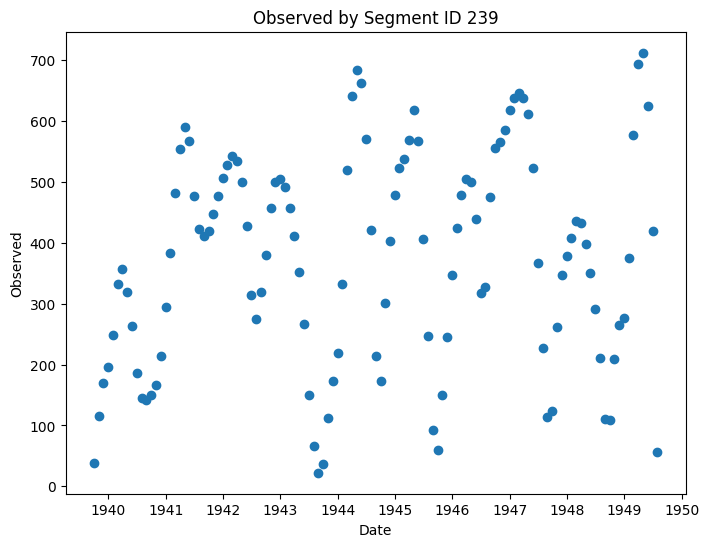

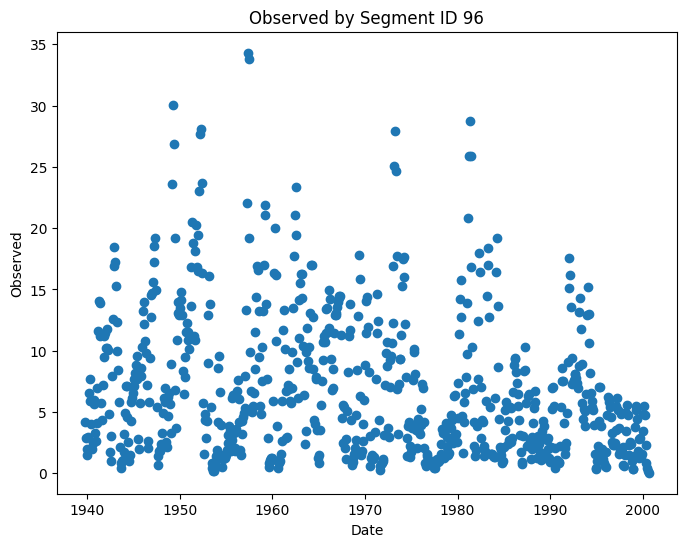

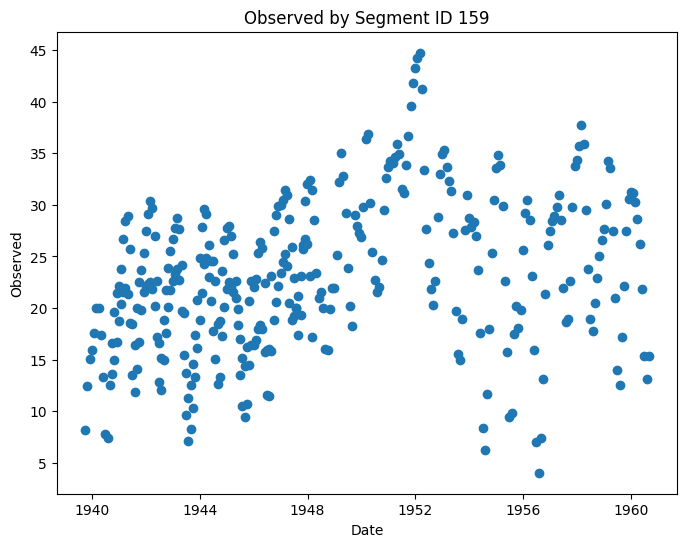

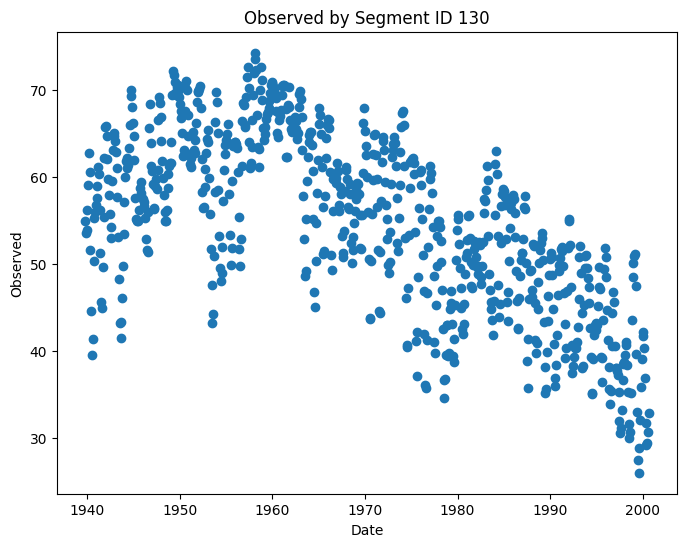

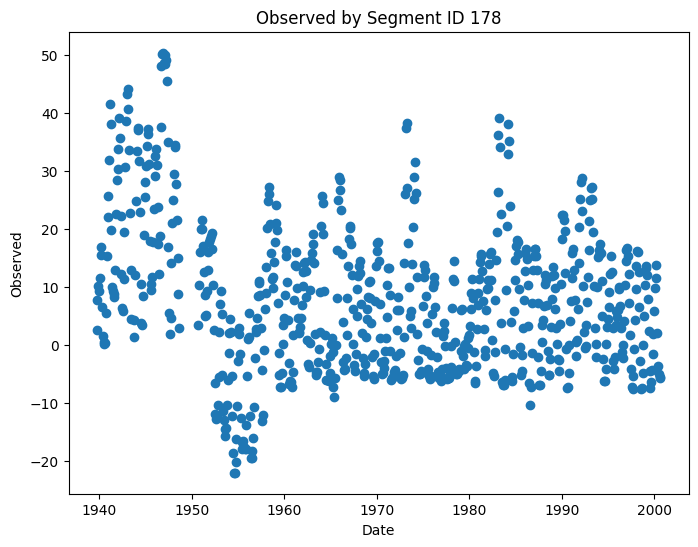

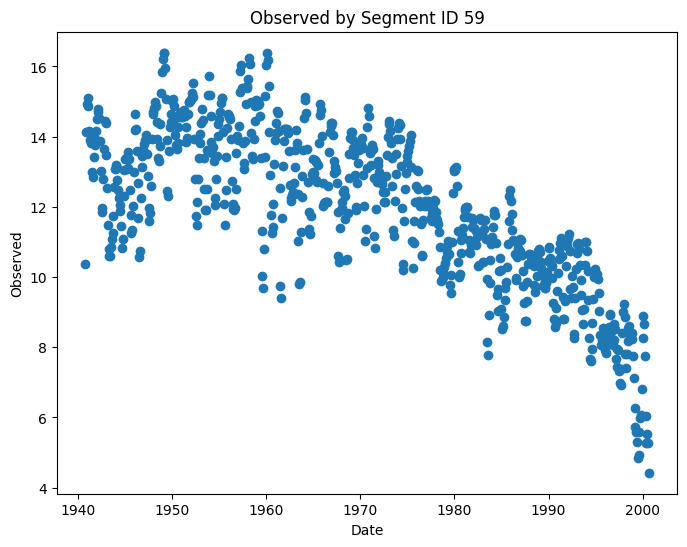

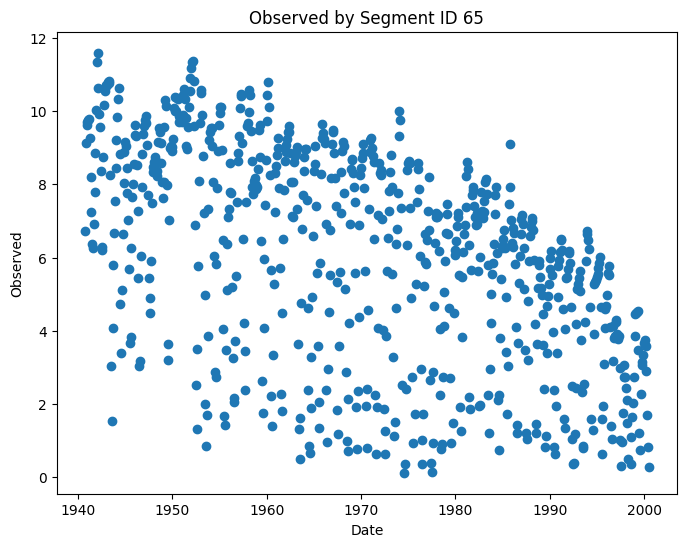

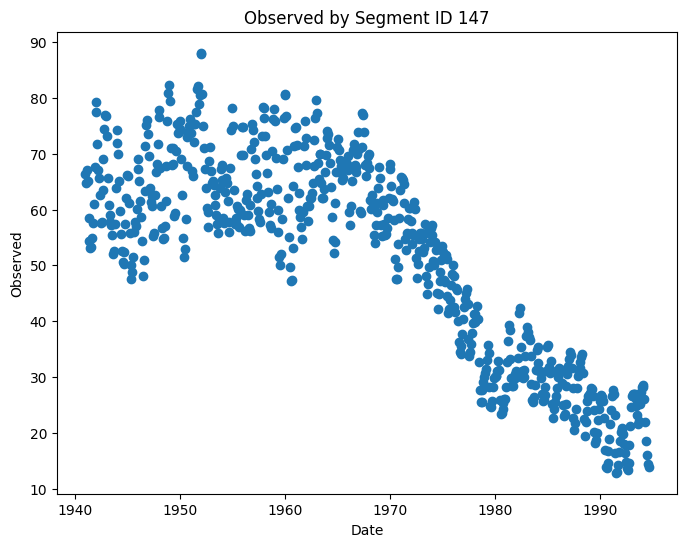

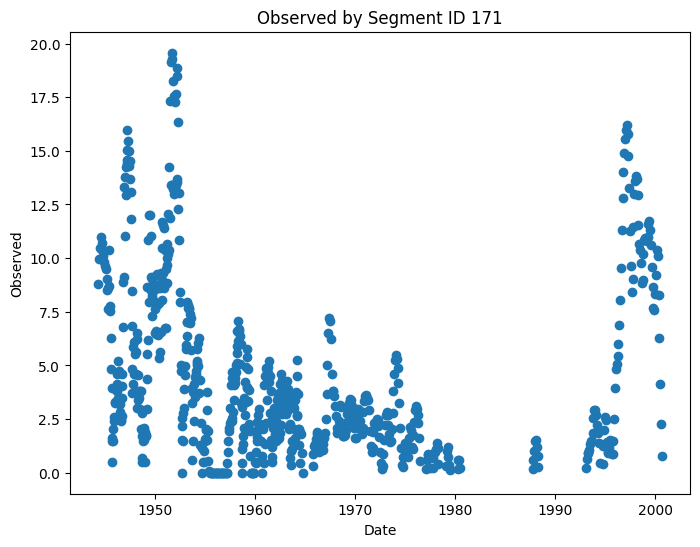

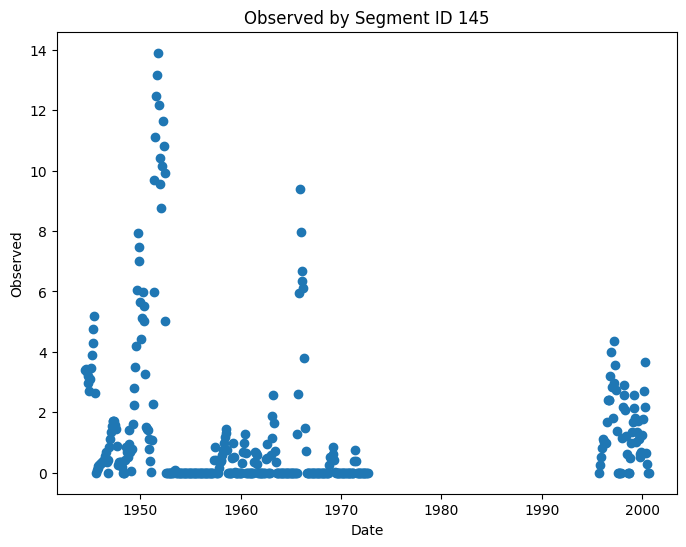

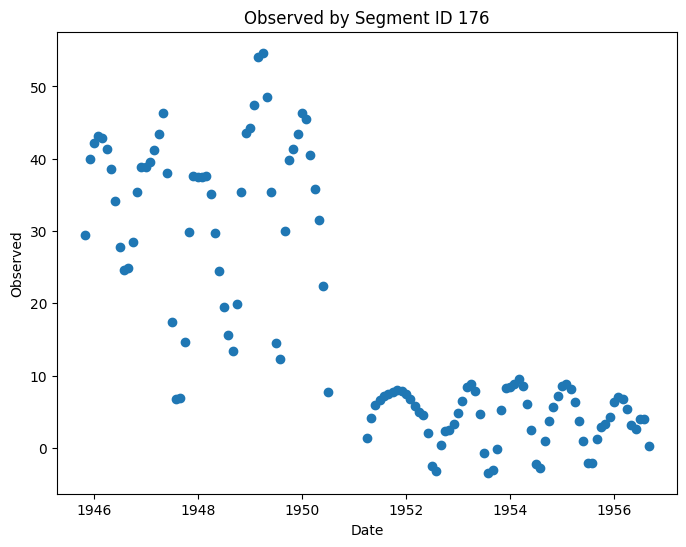

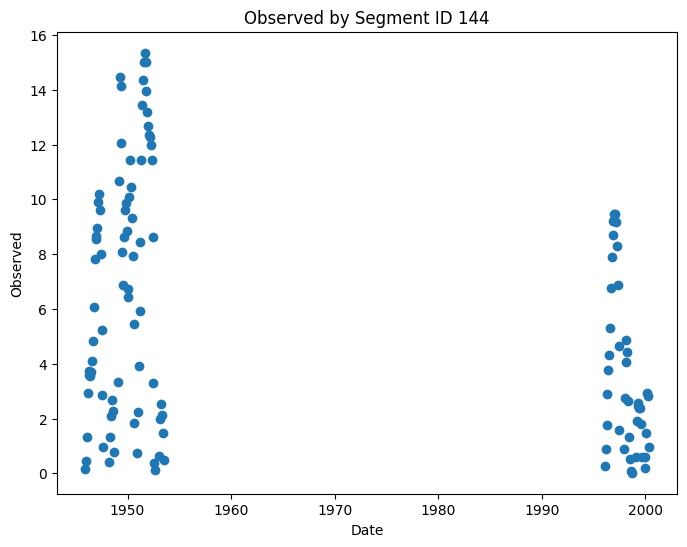

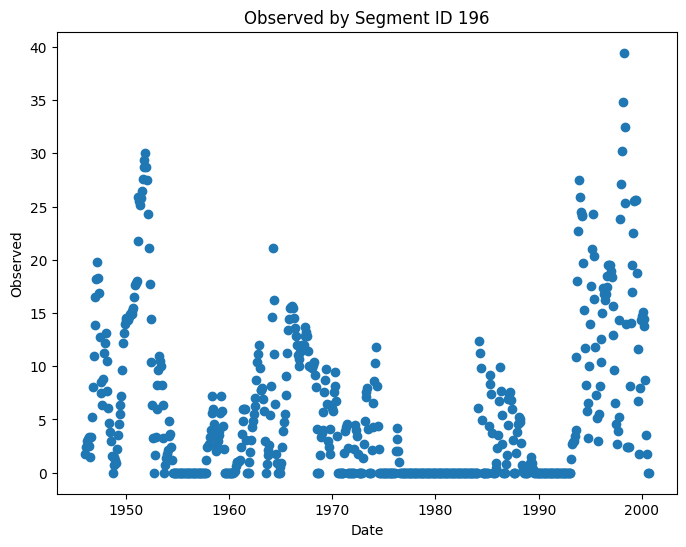

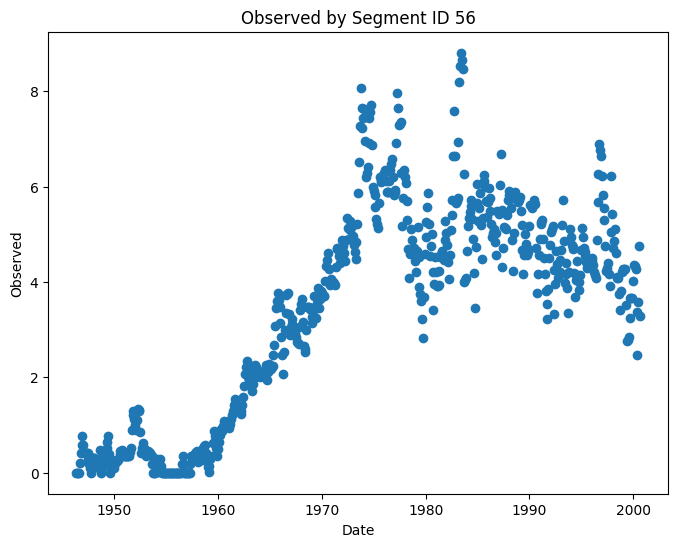

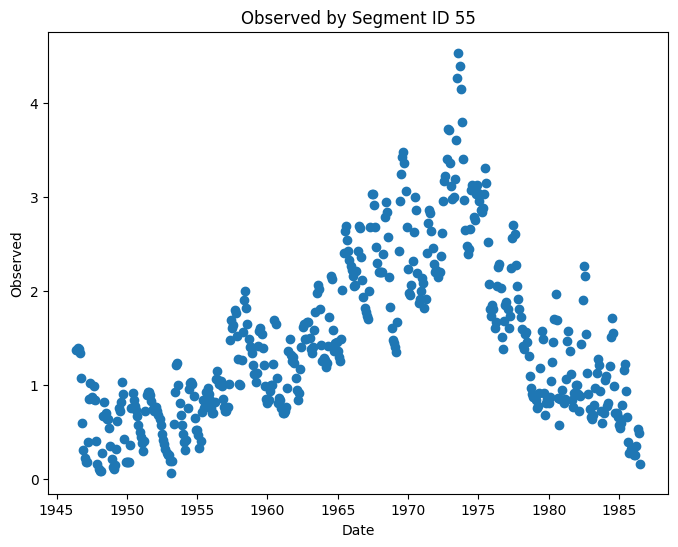

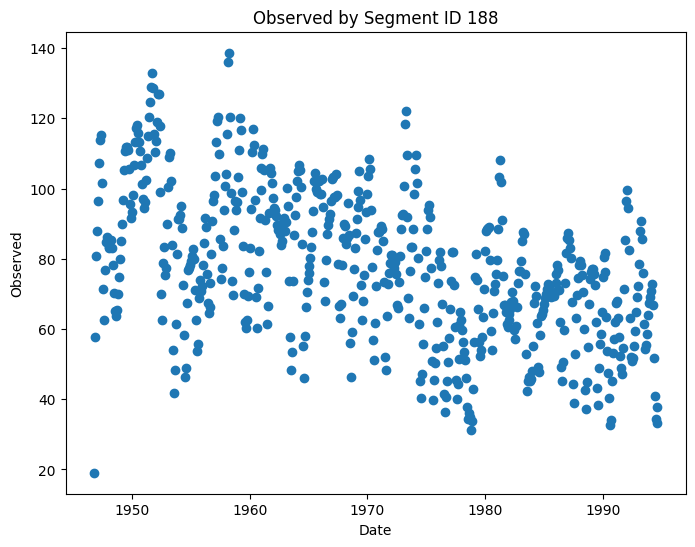

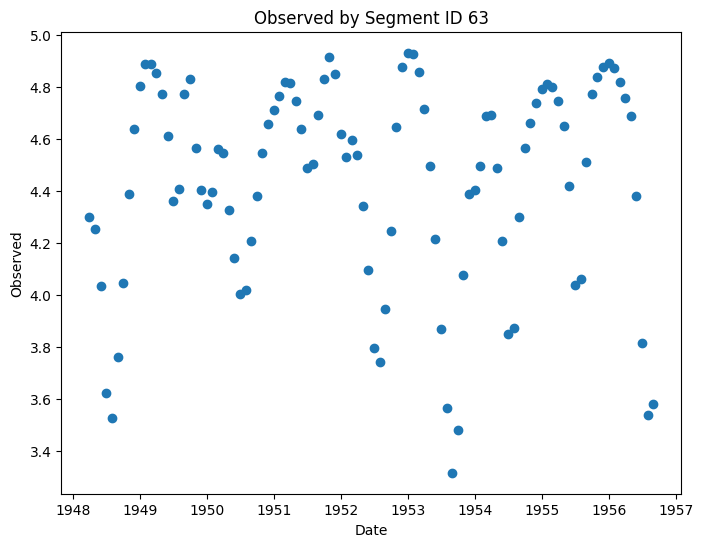

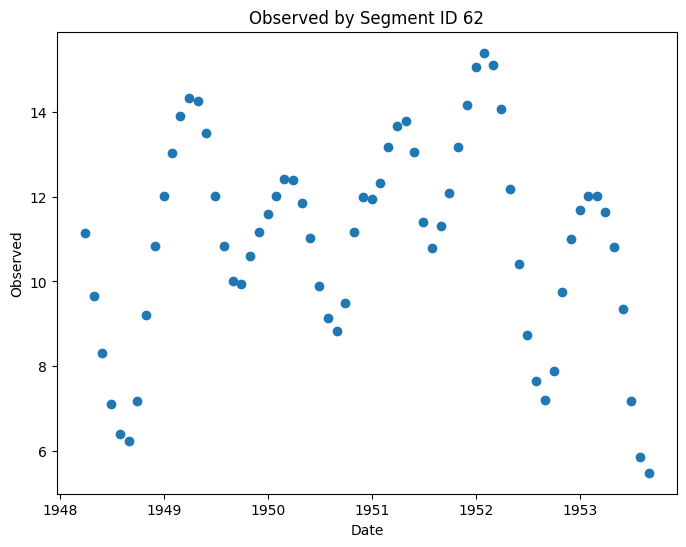

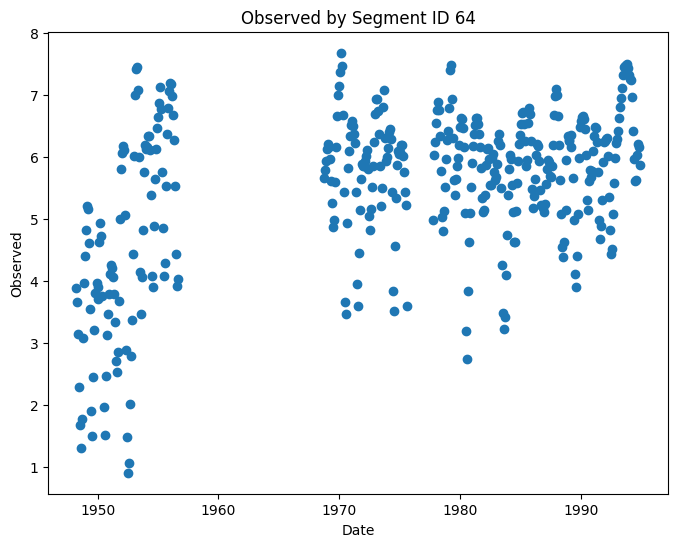

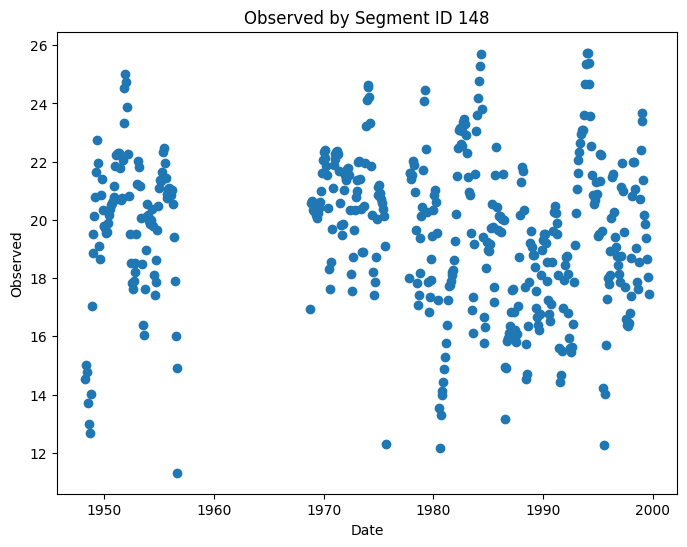

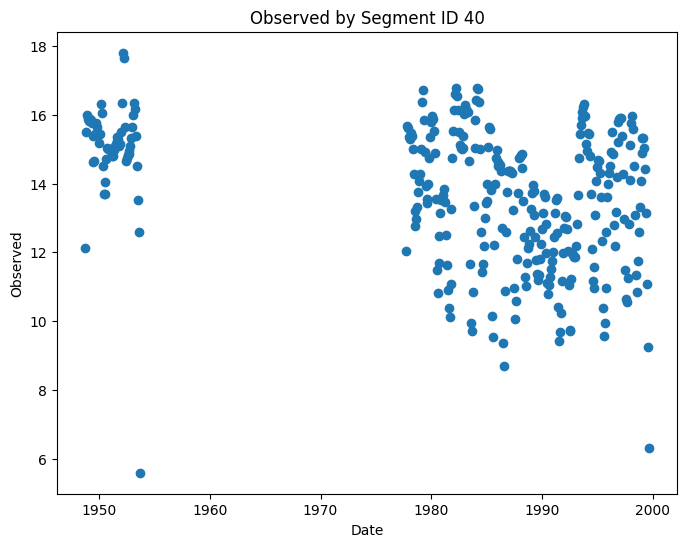

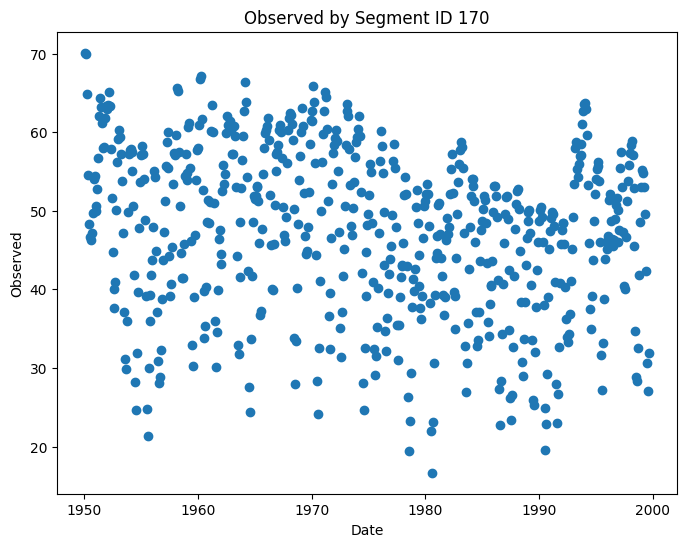

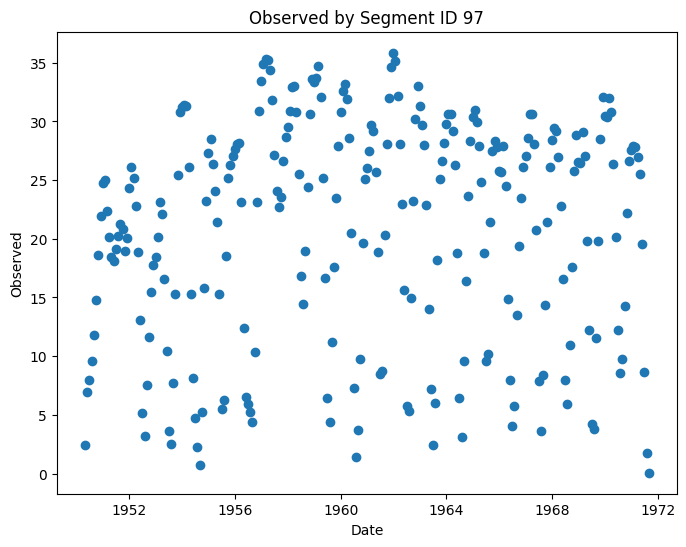

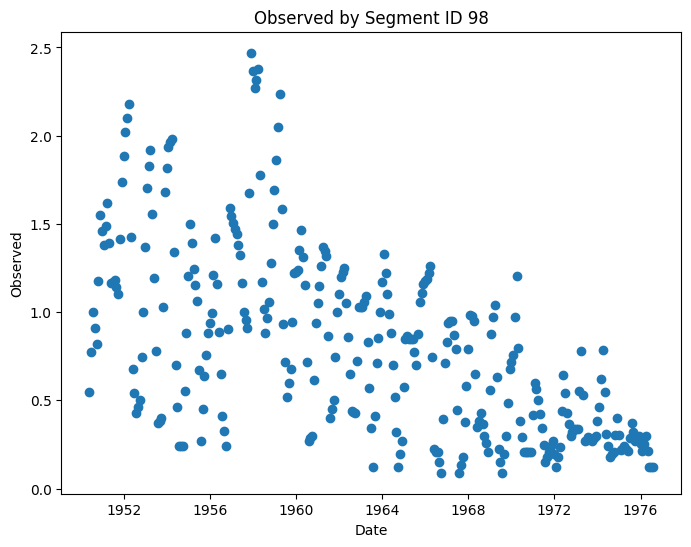

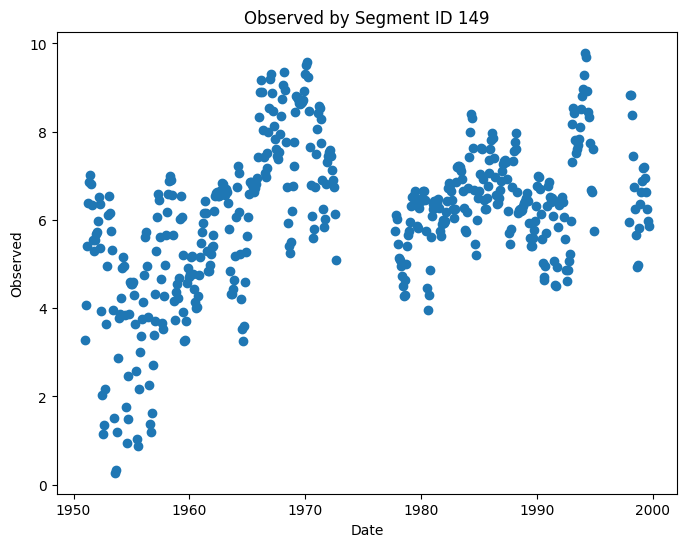

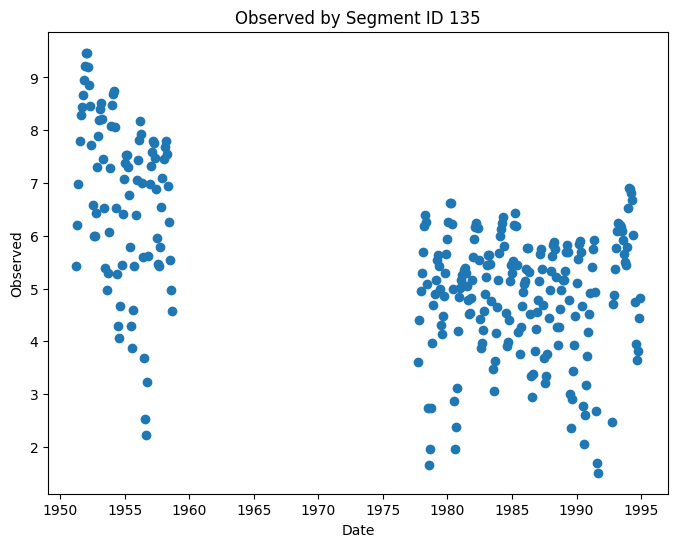

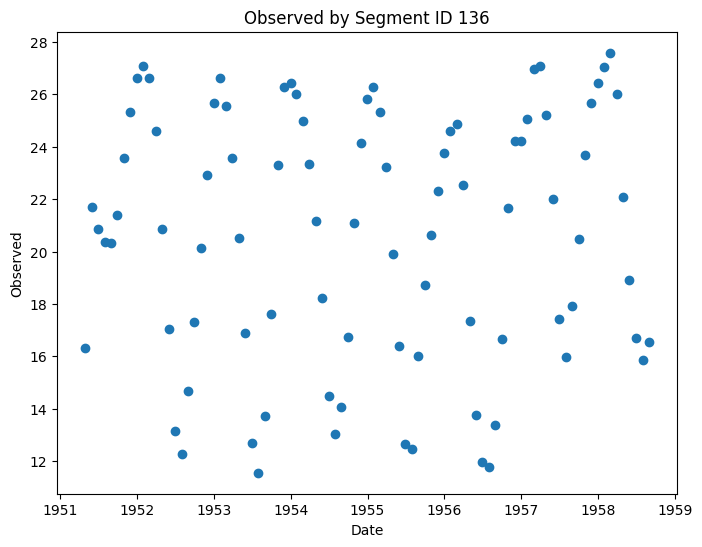

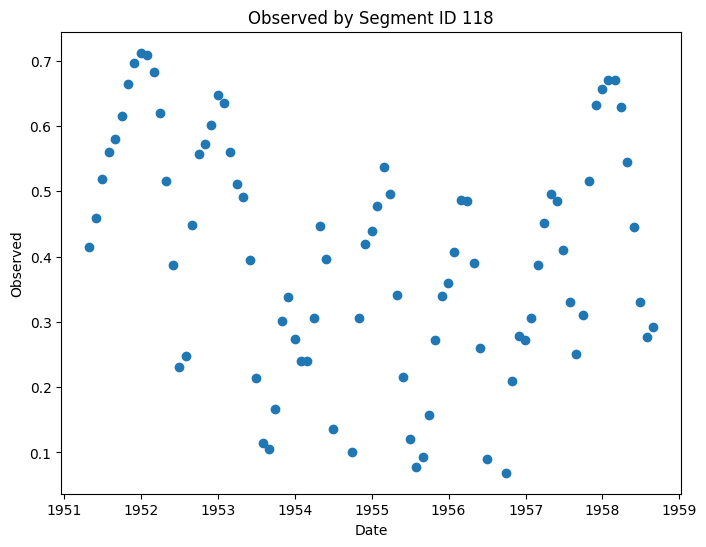

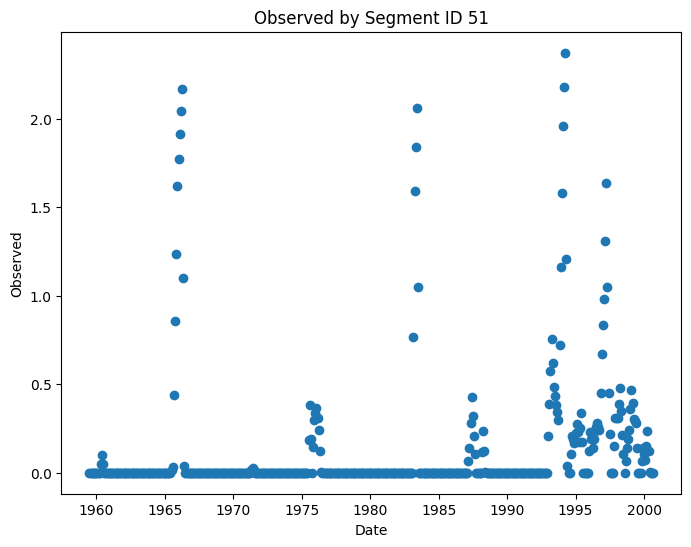

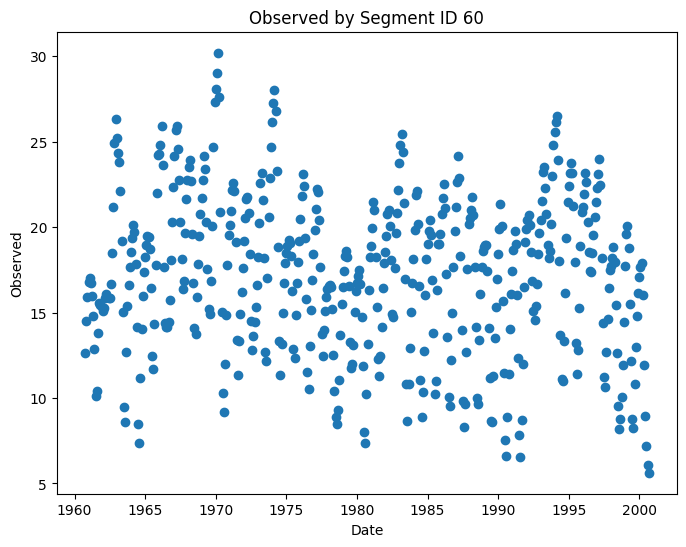

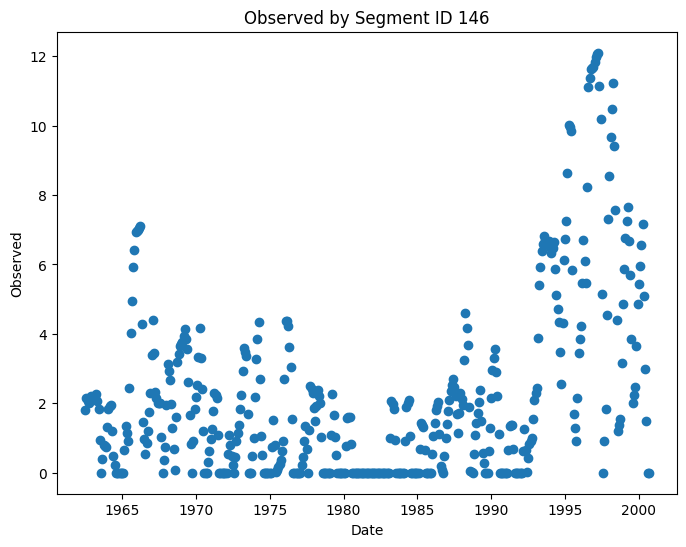

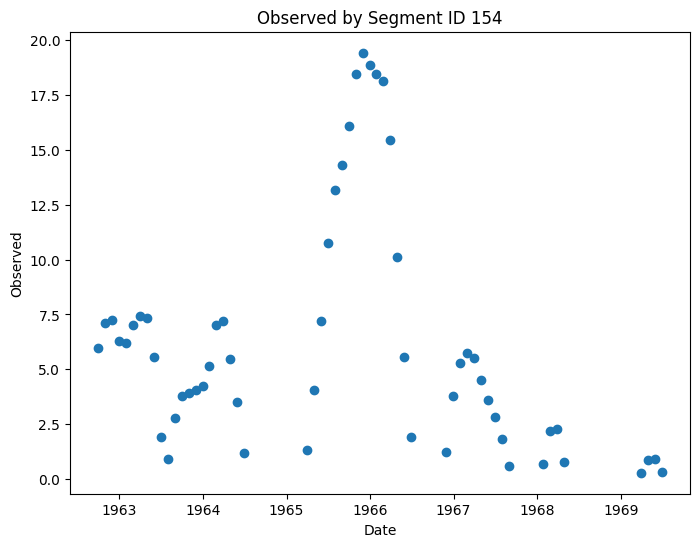

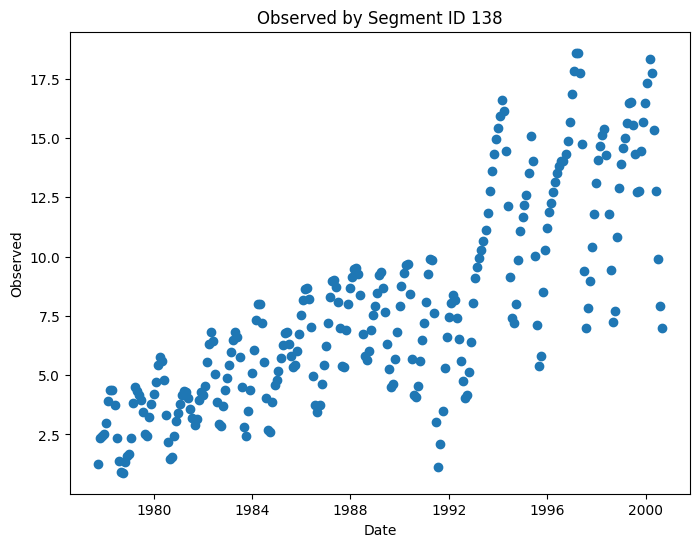

In [50]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Get unique Segment_id values
segment_ids = df1['Segment_id'].unique()

# Create a scatter plot for each Segment_id
#plt.figure(figsize=(15, 10))
for segment_id in segment_ids:
    segment_data = df1[df1['Segment_id'] == segment_id]
    plt.figure(figsize=(8, 6))
    plt.scatter(segment_data['Date'], segment_data['Observed'])

    plt.xlabel('Date')
    plt.ylabel('Observed')
    plt.title(f'Observed by Segment ID {segment_id}')
    plt.show()


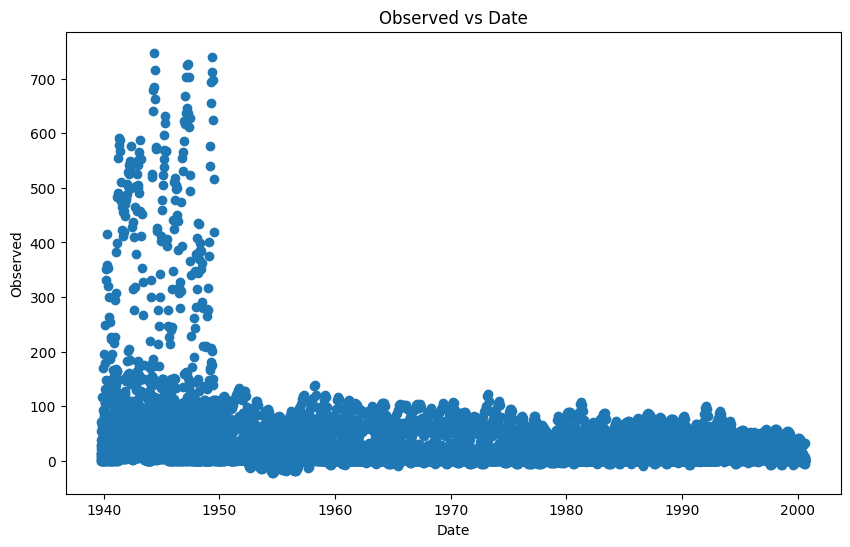

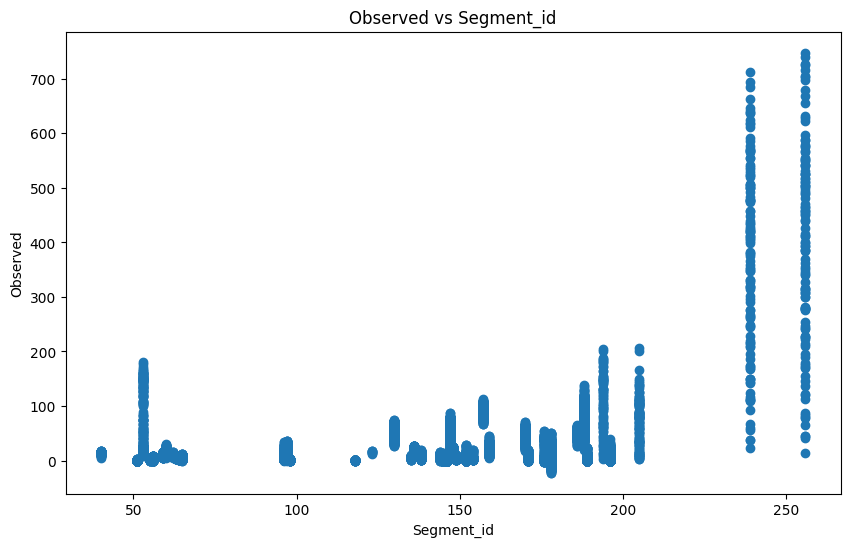

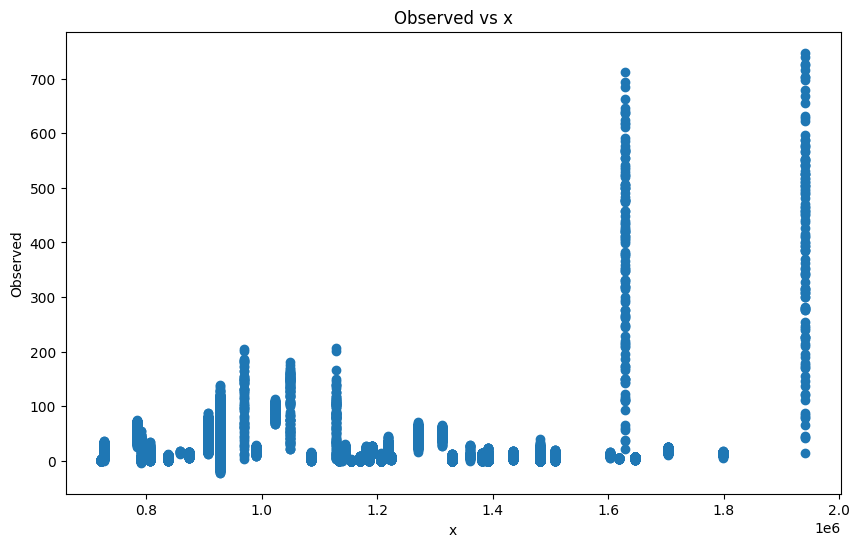

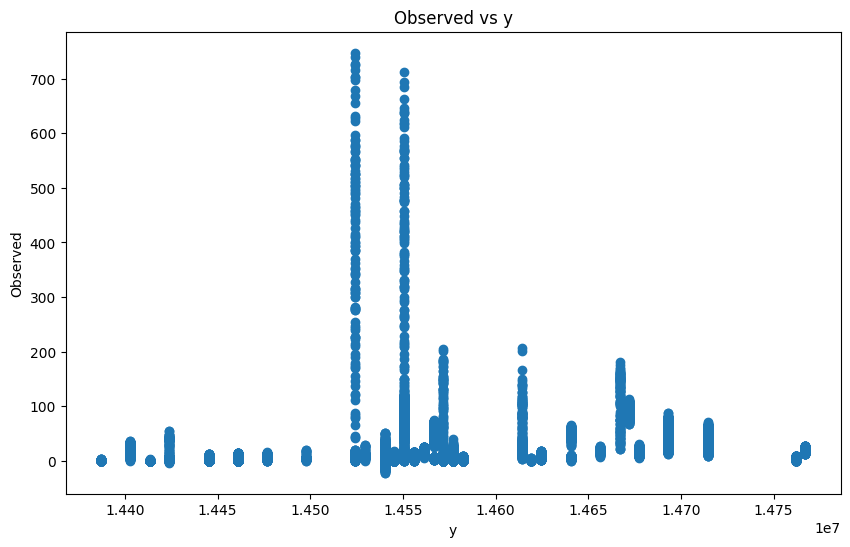

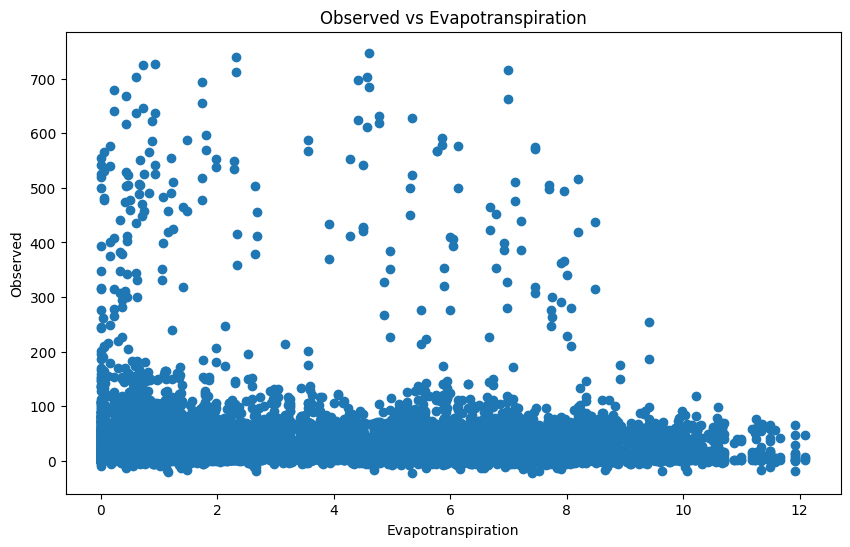

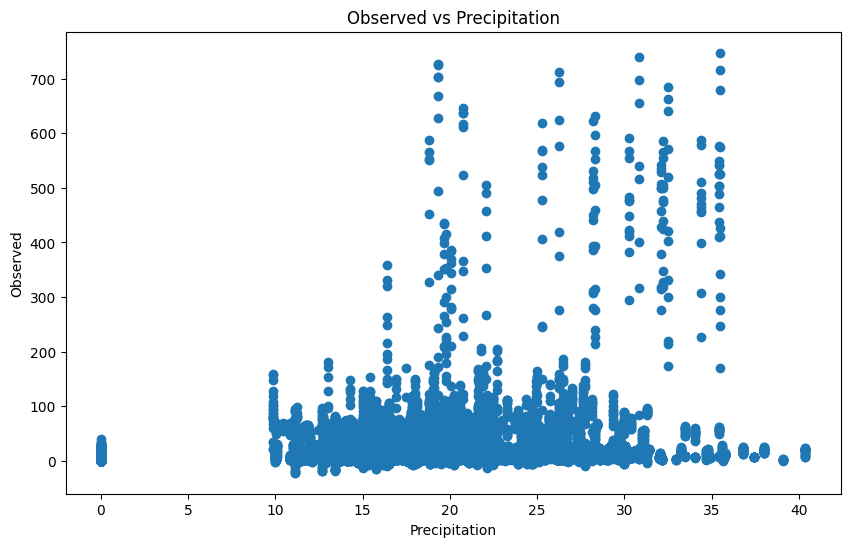

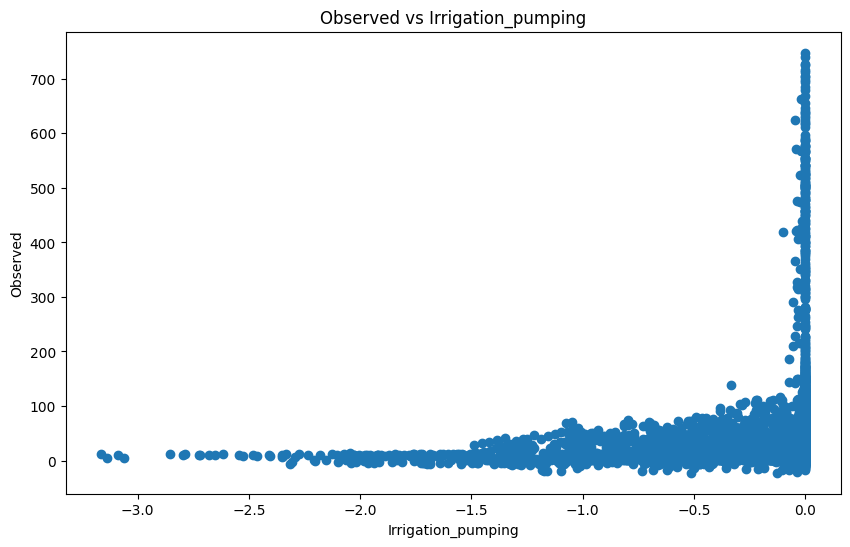

In [51]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Define the list of variables to plot against 'Observed'
variables_to_plot = ['Date', 'Segment_id', 'x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping']

# Create plots for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df1[variable], df1['Observed'])
    plt.xlabel(variable)
    plt.ylabel('Observed')
    plt.title(f'Observed vs {variable}')
    plt.show()


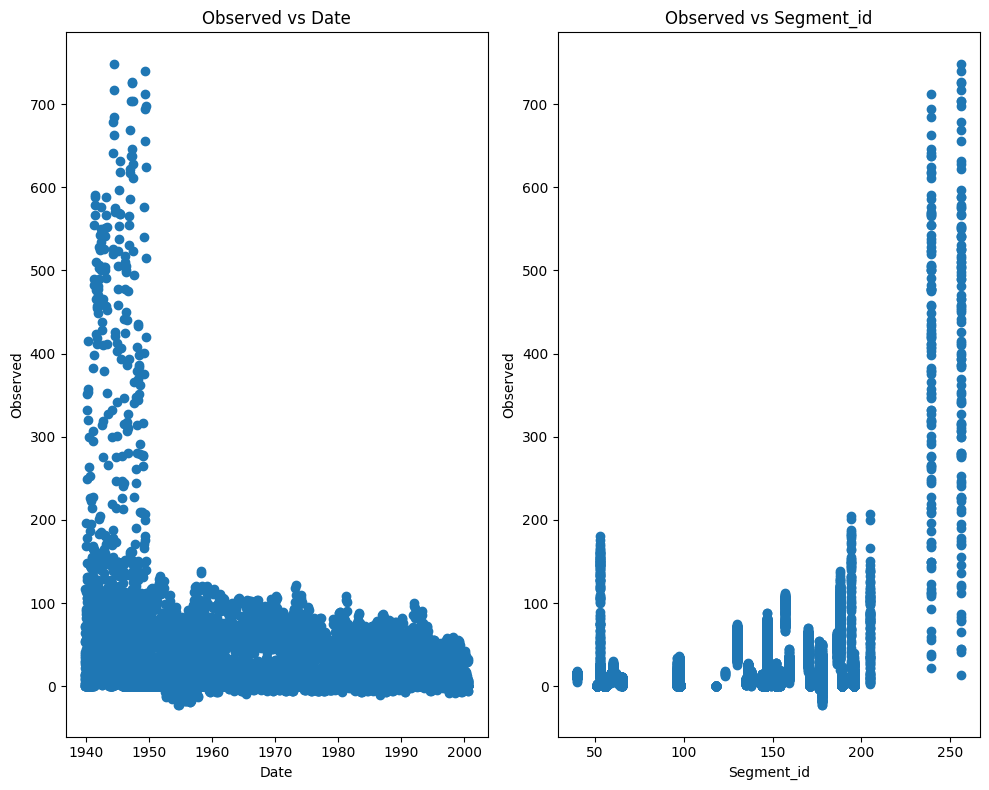

In [69]:
num_plots = len(variables_to_plot)
fig, axes = plt.subplots(1,2, figsize=(10,8))

# Plot each variable against 'Observed'
for ax, variable in zip(axes, variables_to_plot):
    ax.scatter(df1[variable], df1['Observed'])
    ax.set_xlabel(variable)
    ax.set_ylabel('Observed')
    ax.set_title(f'Observed vs {variable}')
plt.tight_layout()
plt.show()